epoch=0, 기울기=0.1143, 절편=0.0036
Error value: 0.2500
epoch=1000, 기울기=0.6151, 절편=-3.9134
Error value: 0.0457
epoch=2000, 기울기=0.8313, 절편=-5.5174
Error value: 0.0301
epoch=3000, 기울기=0.9807, 절편=-6.6027
Error value: 0.0233
epoch=4000, 기울기=1.0988, 절편=-7.4521
Error value: 0.0192
epoch=5000, 기울기=1.1982, 절편=-8.1634
Error value: 0.0164
epoch=6000, 기울기=1.2850, 절편=-8.7823
Error value: 0.0142
epoch=7000, 기울기=1.3627, 절편=-9.3343
Error value: 0.0125
epoch=8000, 기울기=1.4333, 절편=-9.8351
Error value: 0.0111
epoch=9000, 기울기=1.4982, 절편=-10.2952
Error value: 0.0100
epoch=10000, 기울기=1.5585, 절편=-10.7218
Error value: 0.0090



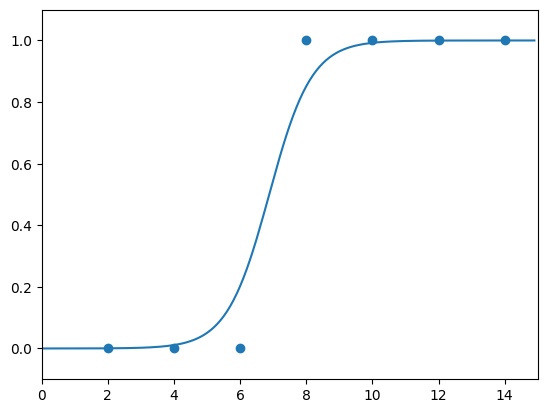

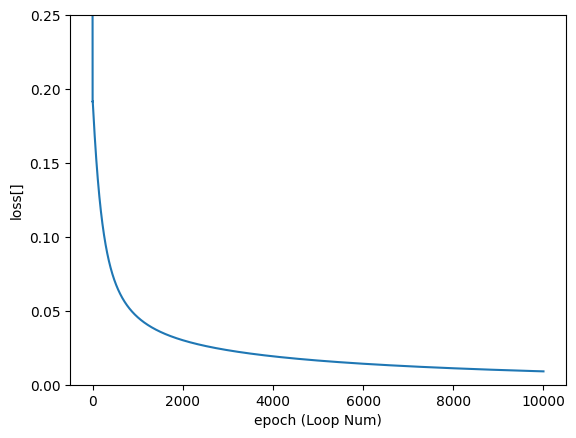


Input: 2.0, Real: 0.0, Expect: 0.0005
Input: 4.0, Real: 0.0, Expect: 0.0111
Input: 6.0, Real: 0.0, Expect: 0.2025
Input: 8.0, Real: 1.0, Expect: 0.8515
Input: 10.0, Real: 1.0, Expect: 0.9923
Input: 12.0, Real: 1.0, Expect: 0.9997
Input: 14.0, Real: 1.0, Expect: 1.0000


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# [14.0, 1.0] -> [14.0, 0.0]으로 변경 후 error 발산
data = [[2.0, 0.0], [4.0, 0.0], [6.0, 0.0], [8.0, 1.0], [10.0, 1.0], [12.0, 1.0], [14.0, 1.0]]
a = 0
b = 0
lr = 0.05

x = [i[0] for i in data]
y = [i[1] for i in data]

# 배열 -> 벡터로 변경
x_data = np.array(x)
y_data = np.array(y)

# 시그모이드 함수 : |예측값 - 실제값|
def sigmoid(x): # 이때 x는 -ax + b를 의미
  return 1 / (1 + np.e ** (-x))

# mse(오차값 제곱 평균) 함수
def error_sum():
  return ((y_data - sigmoid(a * x_data + b)) ** 2).mean()

loss = []
for i in range(10001):
  error_value = error_sum()
  loss.append(error_value)

  # # 실습 2 : error가 발산하면 lr 값을 0.01씩 감소
  # if i > 0 and loss[i] > loss[i - 1]:
  #   lr = lr - 0.01

  a_diff = (1 / len(x_data)) * sum(x_data * (sigmoid(a * x_data + b) - y_data))
  b_diff = (1 / len(y_data)) * sum(sigmoid(a * x_data + b) - y_data)
  a = a - lr * a_diff
  b = b - lr * b_diff

  if i % 1000 == 0:
    print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
    print("Error value: %.4f" % loss[i])

print()
plt.scatter(x_data, y_data) # 점 찍기
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = np.arange(0, 15, 0.1)
plt.plot(x_range, np.array([sigmoid(a * x + b) for x in x_range]))
plt.show()

# loss 값들을 2차원 그래프로 출력
print()
plt.xlabel("epoch (Loop Num)")
plt.ylabel("loss[]")
plt.ylim(0.00, 0.25)
plt.plot(np.arange(0, 10001, 1), loss)  # 선 그리기
plt.show()

# 결과 출력
print()
for i in range(len(data)):
  # Input : 입력값 / Real : 실제값 / Expect : 예측값
  print("Input: %.1f, Real: %.1f, Expect: %.4f" % (data[i][0], data[i][1], sigmoid(a * data[i][0] + b)))